<a href="https://colab.research.google.com/github/drstannwoji2019/SCM_Forecasting/blob/main/Exponential_Smoothing_Space_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Generate synthetic data with seasonality
np.random.seed(0)
n = 200
x = np.linspace(0, 8 * np.pi, n)
noise = np.random.normal(0, 0.5, n)
data = 10 * np.sin(x) + 5 * np.sin(x / 4) + noise

In [3]:
# Create a pandas DataFrame with date index
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data_df = pd.DataFrame(data, index=dates, columns=['demand'])

In [4]:
# Define the ETS model with trend and seasonality components
# Trend: 'add' for additive trend, 'mul' for multiplicative trend, or None for no trend
# Seasonal: 'add' for additive seasonality, 'mul' for multiplicative seasonality, or None for no seasonality
# Seasonal_periods: the number of periods per season (e.g., 12 for monthly data with yearly seasonality)
seasonal_periods = 25
model = ExponentialSmoothing(data_df, trend='add', seasonal='add', seasonal_periods=seasonal_periods)

In [5]:
# Fit the model
model_fit = model.fit()

In [6]:
# Forecast future demand
# We'll forecast demand for the next 10 days
num_steps = 10
forecast = model_fit.forecast(steps=num_steps)

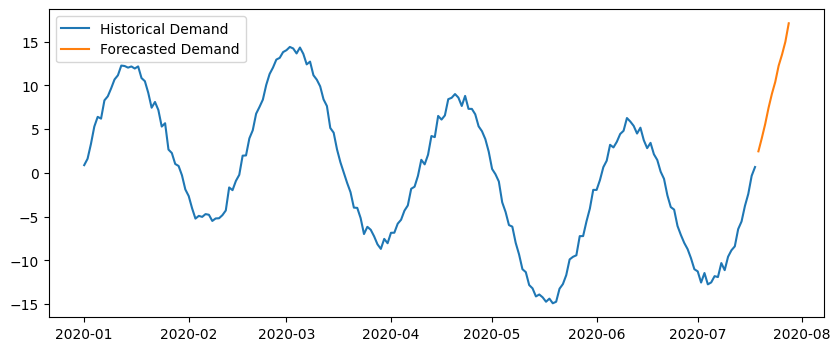

In [7]:
# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(data_df, label='Historical Demand')
plt.plot(forecast, label='Forecasted Demand')
plt.legend()
plt.show()